In [34]:
import scanpy as sc
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tangram as tg 
import numpy as np 

In [35]:
#Spatial data 
dataFolder='./processed_mouse_Ileum/tangram/mapping_immunity/'

ad_spatial=sc.read(dataFolder+'ST_gene_by_cell.csv').transpose()
ad_spatial.var_names_make_unique()

In [36]:
#Single cell data 
csvfilename=dataFolder+'Food-Allergy-LP_normalized_matrix.txt'
adataLP=sc.read(csvfilename).transpose()

csvfilename=dataFolder+'Food-Allergy-PP_normalized_matrix.txt'
adataPP=sc.read(csvfilename).transpose()

ad_sc=adataPP.concatenate(adataLP)

In [4]:
#merge data after applying tangram 
ad_tangram=sc.read_h5ad(dataFolder+'sc_genes_spatial_cell.h5ad')

In [37]:
# cell by gene matrix 
print(ad_spatial.shape) 
print(ad_sc.shape)
print(ad_tangram.shape)

(7416, 241)
(58067, 19221)
(7416, 19187)


In [38]:
coordinates = pd.read_csv(dataFolder+"tissue_positions_list.csv", index_col=0,header=None)
#counts = sc.read_csv("./pnas.1912459116.sd12.csv").transpose()
#adata_merfish = counts[coordinates.index, :]
ad_spatial.obsm["spatial"] = coordinates.to_numpy()
ad_tangram.obsm["spatial"] = coordinates.to_numpy()

In [39]:
#load the already clusterd and cell type name file 

#single cell clusters 
sc_cluster= pd.read_csv(dataFolder+'Food-Allergy-PP-LP_cluster_v1.txt',sep='\t',index_col=0,header=1)
sc_cluster=sc_cluster.to_numpy()
ad_sc.obs['sc_clusters'] = sc_cluster.astype(str)
ad_sc.obs['sc_clusters']=  ad_sc.obs['sc_clusters'].astype('category')
a=np.unique(sc_cluster)
print('SC clusters',sc_cluster.shape,len(a))



#spatial cell clusters 
sp_cluster= pd.read_csv(dataFolder+'louvain_cluster.dat',sep=',',index_col=0,header=0)
sp_cluster=sp_cluster.to_numpy()
ad_spatial.obs['sp_clusters'] = sp_cluster.astype(str)
ad_tangram.obs['sp_clusters'] = sp_cluster.astype(str)
ad_tangram.obs['sp_clusters']=ad_tangram.obs['sp_clusters'].astype('category')
ad_spatial.obs['sp_clusters']=ad_spatial.obs['sp_clusters'].astype('category')




#Spatial cell clusters names 
ctname=pd.read_csv(dataFolder+'BiologicalNameOfCT.dat',sep='\t',index_col=0,header=None)
ctname=ctname.to_numpy()
sp_cluster_names=ctname[:,0]
print('spatial clusters name',sp_cluster_names)



#single cell clusters names
ctname=pd.read_csv(dataFolder+'scNameOfCT.dat',sep='\t',index_col=0,header=None)
ctname=ctname.to_numpy()
sc_cluster_names=ctname[:,0]
print('sc clusters name',sc_cluster_names)


SC clusters (58067, 1) 46
spatial clusters name ['B_Follicular_Circulating' 'B_Plasma' 'Endothelial'
 'Enterocyte_Bottom_Villus' 'Enterocyte_Mid_Villus'
 'Enterocyte_Top_Villus' 'Goblet' 'ICC' 'Macrophage_p_DC'
 'Myenteric_Plexus' 'Paneth' 'Pericyte' 'Smooth_Muscle' 'Stem_p_TA'
 'Stromal' 'T_CD4p' 'T_CD8p' 'Telocyte' 'Tuft']
sc clusters name ['Resting CD4+ T cell' 'Resting B cell' 'ILC3' 'LTi cell' 'CD8+ T cell'
 'pDC' 'Activated CD4+ T cell' 'NK cell' 'GCBcell(DZ)' 'GC B cell (LZ)'
 'ILC1' 'ILC2' 'CD4+ T cell (low UMI count)' 'DC (CD103+CD11b+)'
 'ILC3 (low UMI count)' 'LTi cell (low UMI count)' 'γσ T cell (Xcl1+)'
 'Unresolved1' 'NKT cell' 'Plasma cell' 'DC (D103+CD11b–)' 'Macrophage'
 'Resting B cell (low UMI count)' 'DC (D103– C1)' 'Endothelial cell'
 'Mast cell' 'NK cell (low UMI count)' 'GC B cell (low UMI count)'
 'Doublets' 'Epithelial cell C1' 'DC (D103– C2)' 'Stromal cell (DN)'
 'Fibroblast' 'Unresolved2' 'Epithelial cell C2' 'Neutrophil' 'Unresolved'
 'γσ T cell (Gzma+)' 'Ep

In [40]:
sc.pp.normalize_total(ad_spatial, inplace=True)
sc.pp.log1p(ad_spatial)

#sc.pp.highly_variable_genes(adata, flavor="seurat", n_top_genes=2000)
#sc.pl.highly_variable_genes(adata,show=False,save='.png')

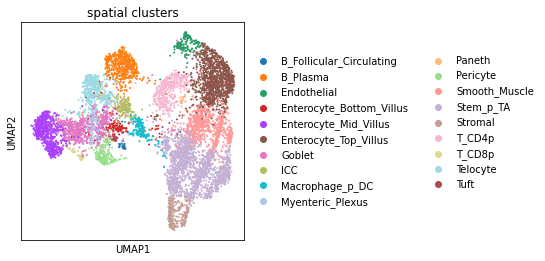

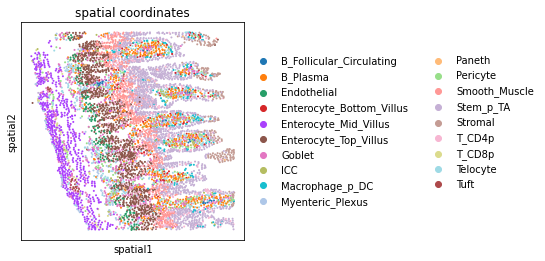

In [41]:
#spatial cells UMAP 
sc.pp.pca(ad_spatial)
sc.pp.neighbors(ad_spatial)
sc.tl.umap(ad_spatial)
#sc.tl.leiden(ad_spatial, resolution=1.5)
#sc.tl.louvain(ad_spatial,resolution=1.5)

#plt.rcParams["figure.figsize"] = (4, 4)
#sc.pl.umap(ad_spatial, color=["leiden","louvain"], wspace=0.4,show=True, save='_spatial_leiden_louvain.png')

ad_spatial.obs['sp_clusters'] = ad_spatial.obs['sp_clusters'].cat.rename_categories(sp_cluster_names)
sc.pl.umap(ad_spatial, color="sp_clusters",title='spatial clusters',show=True,save='_spatial_known_clusters.png')
sc.pl.embedding(ad_spatial, basis="spatial", color="sp_clusters",title='spatial coordinates')


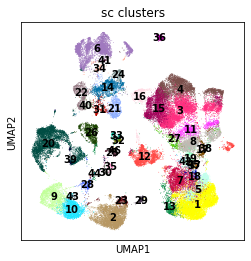

46 46


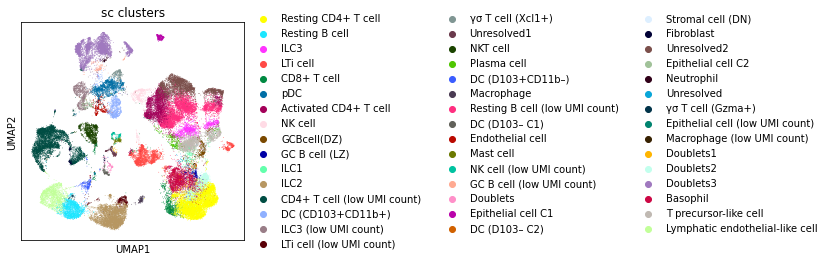

In [42]:
#single cells umap 

sc.pp.normalize_total(ad_sc, inplace=True)
sc.pp.log1p(ad_sc)
sc.pp.pca(ad_sc)
sc.pp.neighbors(ad_sc)
sc.tl.umap(ad_sc)

#sc.tl.leiden(ad_sc, resolution=1.5)
#plt.rcParams["figure.figsize"] = (4, 4)
#sc.pl.umap(ad_sc, color=["leiden"], wspace=0.4,show=False, save='_sc_leiden.png')

sc.pl.umap(ad_sc, color="sc_clusters",legend_loc='on data',title='sc clusters',show=True,save='_sc_clusters.png')

print(len(np.unique(sc_cluster)),len(np.unique(sc_cluster_names)))

ad_sc.obs['sc_clusters'] = ad_sc.obs['sc_clusters'].cat.rename_categories(sc_cluster_names)
sc.pl.umap(ad_sc, color="sc_clusters",title='sc clusters',show=True,save='_sc_clusters.png')


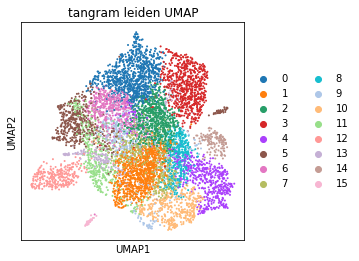

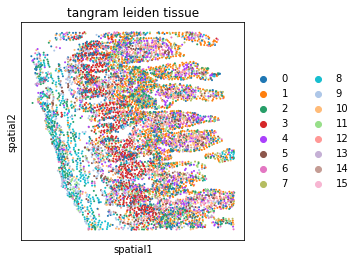

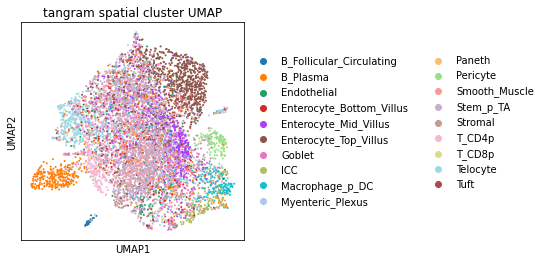

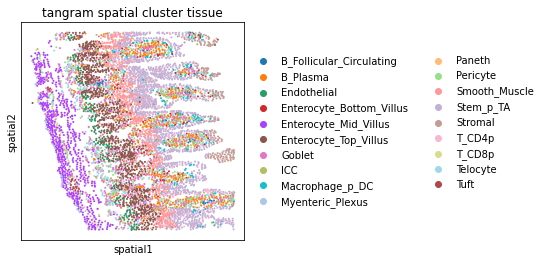

In [43]:
# UMAP of after the mapping 

sc.pp.normalize_total(ad_tangram, inplace=True)
sc.pp.log1p(ad_tangram)

sc.pp.pca(ad_tangram)
sc.pp.neighbors(ad_tangram)
sc.tl.umap(ad_tangram)
sc.tl.leiden(ad_tangram, key_added="leiden")

sc.pl.umap(ad_tangram, color=["leiden"],wspace=0.4,show=True,
           title='tangram leiden UMAP',save='_merged_leiden.png')
sc.pl.embedding(ad_tangram, basis="spatial", color="leiden",
                title='tangram leiden tissue')


ad_tangram.obs['sp_clusters'] = ad_tangram.obs['sp_clusters'].cat.rename_categories(sp_cluster_names)
sc.pl.umap(ad_tangram, color=['sp_clusters'],wspace=0.4,show=True,
           title='tangram spatial cluster UMAP',save='_merged_known_clusters.png')
sc.pl.embedding(ad_tangram, basis="spatial", color="sp_clusters",title='tangram spatial cluster tissue')


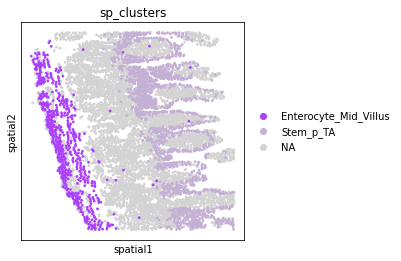

In [44]:
sc.pl.embedding(ad_spatial, basis='spatial',color="sp_clusters", 
                groups=["Enterocyte_Mid_Villus", "Stem_p_TA"], alpha=1,size=30)


In [45]:
genesum=np.sum(ad_spatial.X,axis=0)
genemean=np.mean(ad_spatial.X,axis=0)
cellsum=np.sum(ad_spatial.X,axis=1)
print(genesum.shape,genemean.shape,cellsum.shape)
#df=pd.DataFrame(data=adata.X.transpose(), index=adata.var_names , columns=adata.obs_names)
#df.to_csv("xxoutput_filter_"+filename+".csv")
cellname=ad_spatial.obs_names.to_numpy()
genename_spatial=ad_spatial.var_names.to_numpy()
genename_merged=ad_tangram.var_names.to_numpy()

#genename=genename.reshape((len(genename),1))

index=np.argsort(-genesum)
#Top 20 gene sorted according to their mean expression in spatial data 
for i in range(20):
    print(genename_spatial[index[i]],genemean[index[i]])
    
  
#somehow tangram make all the gene name in lowercase letter 
genename_merged = [each_string.capitalize() for each_string in genename_merged]

common_genes=set(genename_spatial).intersection(set(genename_merged))

print('\n\ncommon',common_genes)

(241,) (241,) (7416,)
Neat1 1.4161657
Slc51a 0.9736351
Slc5a1 0.94674546
Txndc5 0.92952883
Clca3b 0.835351
Sdc1 0.81116843
Nlrp6 0.76421785
Cps1 0.74084425
Acta2 0.71616846
Vim 0.5810453
Apob 0.5692399
Maoa 0.55782557
H2-Eb1 0.5164484
Ifnar1 0.48109952
Net1 0.4795036
Fzd5 0.46253517
Lpar1 0.41800344
Cd44 0.39973825
Slc12a2 0.3623207
Tspan13 0.33458102


common {'S1pr5', 'Vcan', 'Fzd2', 'P2ry10', 'S100b', 'Cd44', 'Lamp3', 'Ptger2', 'Cd8b1', 'Cps1', 'Htr7', 'Ms4a1', 'Rcor2', 'Net1', 'Trdc', 'Agr3', 'Acta2', 'Cd4', 'Mki67', 'Hrh4', 'Gpr84', 'Fzd8', 'Hrh1', 'Fzd10', 'Hmgb2', 'S1pr4', 'Drd4', 'Lpar5', 'Ighd', 'Ptgfr', 'Gcgr', 'Chrm3', 'Cd14', 'Fzd3', 'Gper1', 'Slc2a2', 'Cadm1', 'Stmn1', 'Itgam', 'Gpr18', 'Scarb1', 'Adgrd1', 'Il3ra', 'Gpr55', 'Ffar1', 'Nt5e', 'Acsl1', 'Elavl3', 'Gp2', 'Adra2c', 'Itgae', 'Sox10', 'Cd79b', 'Pzp', 'Adra2a', 'Glp2r', 'Mzb1', 'Cspg4', 'Sell', 'Il4', 'Fzd1', 'Il17a', 'Adrb1', 'Icos', 'Nlrp6', 'Slc5a1', 'Fcer1a', 'Il9', 'Lrmp', 'Lct', 'Cd3d', 'Avil', 'Cnr1', 'Slc18

In [46]:
sp_cluster_names

array(['B_Follicular_Circulating', 'B_Plasma', 'Endothelial',
       'Enterocyte_Bottom_Villus', 'Enterocyte_Mid_Villus',
       'Enterocyte_Top_Villus', 'Goblet', 'ICC', 'Macrophage_p_DC',
       'Myenteric_Plexus', 'Paneth', 'Pericyte', 'Smooth_Muscle',
       'Stem_p_TA', 'Stromal', 'T_CD4p', 'T_CD8p', 'Telocyte', 'Tuft'],
      dtype=object)

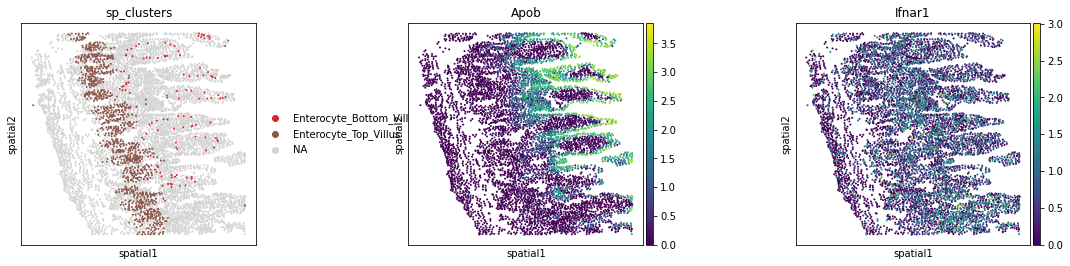

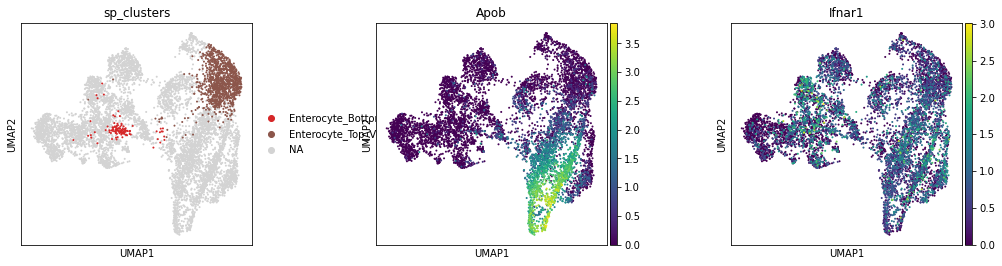

In [47]:
#plot genes and cell types on spatial data 
sc.pl.embedding(ad_spatial, basis='spatial',wspace=0.5,
color=["sp_clusters", "Apob","Ifnar1" ],
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

sc.pl.umap(ad_spatial, color=["sp_clusters", "Apob","Ifnar1" ],
wspace=0.4,show=True,
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

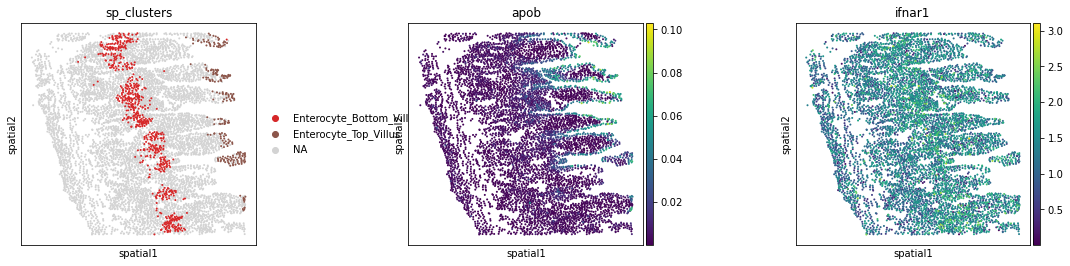

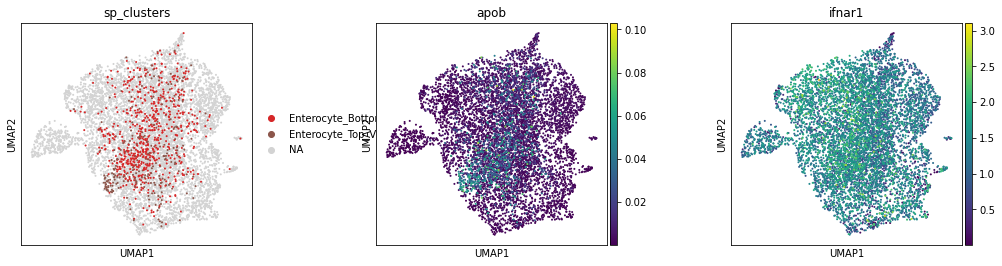

In [29]:
#plot genes and cell types on mapping merged data 
sc.pl.embedding(ad_tangram, basis='spatial',wspace=0.5,
color=["sp_clusters", "apob","ifnar1" ],
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])

sc.pl.umap(ad_tangram, color=["sp_clusters", "apob","ifnar1" ],
wspace=0.4,show=True,
groups=["Enterocyte_Bottom_Villus", "Enterocyte_Top_Villus"
])


In [19]:
ad_spatial.write_h5ad(dataFolder+'saveall_spatial')
ad_tangram.write_h5ad(dataFolder+'saveall_merged')